# **MentalDisorders-KNN-Predict**

**Date: 20.03.2024**

**Created by: Preksha Shah | 2348446**

**Dataset: Burden disease from each mental-illness**

**Import necessary libraries:**

In [67]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

**Display basic information about the dataset:**

In [47]:
#Load the dataset of your choice into your Python environment.
data = pd.read_csv("/content/2- burden-disease-from-each-mental-illness(1).csv")

In [48]:
# Print the number of samples (rows) and features (columns) in the dataset
print("Number of samples:", data.shape[0])
print("Number of features:", data.shape[1])

Number of samples: 6840
Number of features: 8


In [49]:
# Print data types of each feature
print("\nData types of features:")
print(data.dtypes)


Data types of features:
Entity                                                                             object
Code                                                                               object
Year                                                                                int64
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders    float64
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia           float64
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder        float64
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders        float64
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders       float64
dtype: object


In [51]:
# Print the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders  \
0                                          895.22565                                
1                                          893.88434                                
2                                          892.34973                                
3                                          891.51587                                
4                                          891.39160                                

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia  \
0                                          138.24825                         
1                                          137.76122                         
2                                          137.0

# **Univariate Analysis**

**For Numerical Variables:**

In [52]:
#Calculate basic descriptive statistics
numerical_variables = ['DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders',
                       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia',
                       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder',
                       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders',
                       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders']
print("\nBasic Descriptive Statistics for Numerical Variables:")
print(data[numerical_variables].describe())


Basic Descriptive Statistics for Numerical Variables:
       DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders  \
count                                        6840.000000                                
mean                                          652.215475                                
std                                           183.643326                                
min                                           243.097840                                
25%                                           506.857413                                
50%                                           640.099150                                
75%                                           765.842910                                
max                                          1427.423600                                

       DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia  \
count                                        6840.000000     

**Inference:**

* The dataset spans from the year 1990 to 2019.
* The mean DALYs rates vary across different causes of disorders, with depressive disorders having the highest mean rate.
* There is considerable variability in DALYs rates across different causes, as indicated by the standard deviations.
* The distribution of DALYs rates for each cause can be further explored through visualization techniques such as histograms and box plots.


Histograms for Numerical Variables:


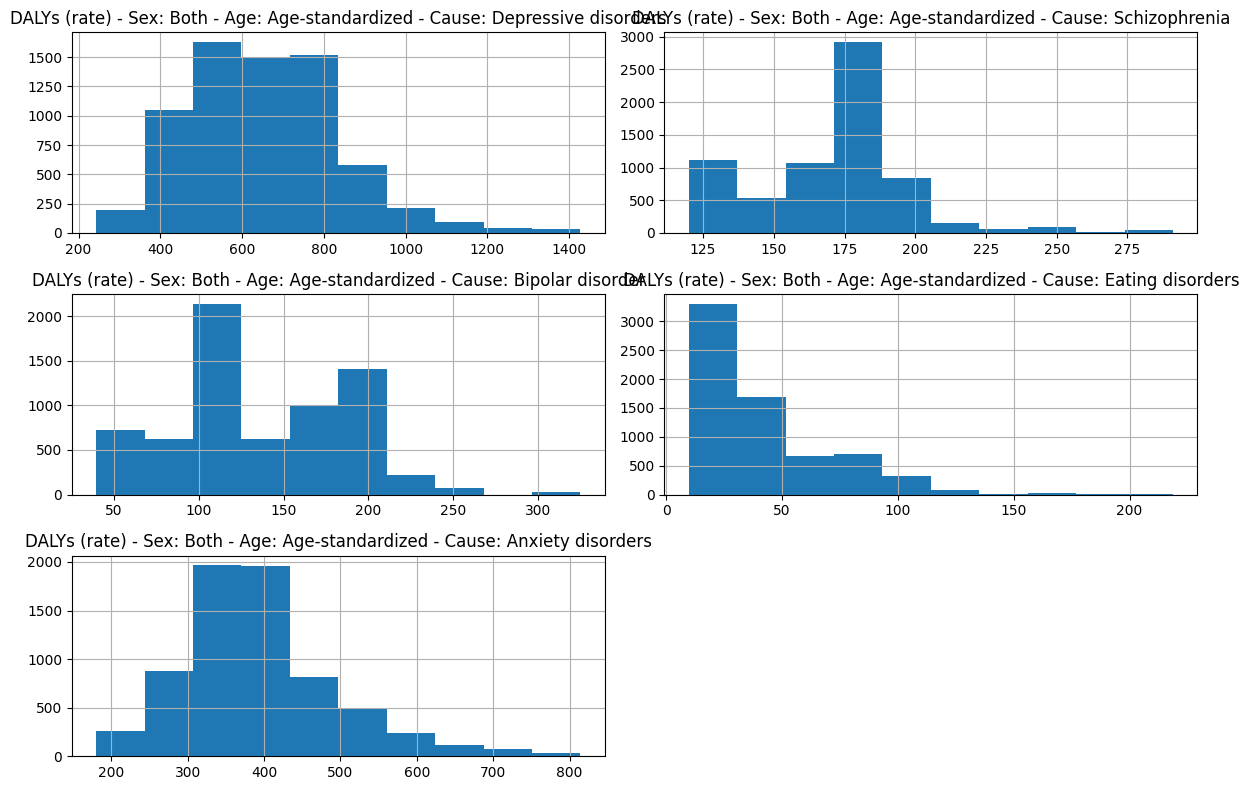

In [92]:
# Visualize the distribution using histograms
print("\nHistograms for Numerical Variables:")
data[numerical_variables].hist(figsize=(12, 8))
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histograms for Numerical Variables")
plt.tight_layout()
plt.show()

**Inference:**
Depressive Disorders is most prevelant, followed by Anxiety Disorders, Bipolor Disorders, Schizphrenia and Eating Disorder.


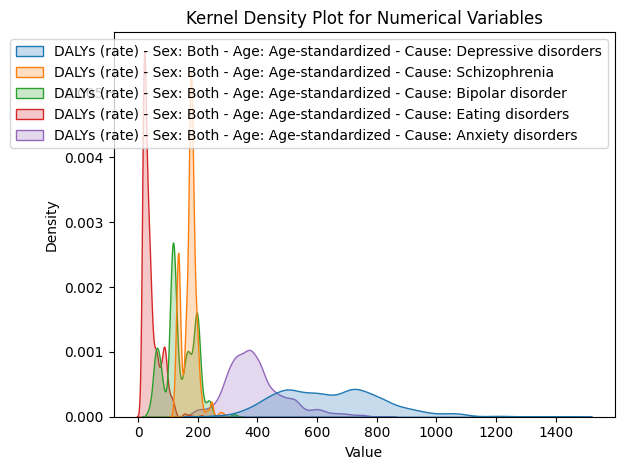

In [54]:
# Kernel Density Plots
sns.kdeplot(data=data[numerical_variables], fill=True)
plt.title("Kernel Density Plot for Numerical Variables")
plt.xlabel("Value")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

**Inference:**
Schizopherphrenia, Bipolor and Eating Idsorder have spiked density from 0 to 300, while Axiety slightly from 250 to 550, and lastly Dpressive Disorder comparatively stable from 350 to 900.

**For Categorical Variables:**

In [55]:
# Univariate Analysis for Categorical Variables
# Display frequency tables showing counts and percentages
categorical_variables = ['Entity', 'Code', 'Year']
for variable in categorical_variables:
    print(f"\nFrequency Table for '{variable}':")
    print(data[variable].value_counts(normalize=True))


Frequency Table for 'Entity':
Afghanistan           0.004386
Nigeria               0.004386
North America (WB)    0.004386
North Korea           0.004386
North Macedonia       0.004386
                        ...   
Grenada               0.004386
Guam                  0.004386
Guatemala             0.004386
Guinea                0.004386
Zimbabwe              0.004386
Name: Entity, Length: 228, dtype: float64

Frequency Table for 'Code':
AFG    0.004878
PNG    0.004878
NIU    0.004878
PRK    0.004878
MKD    0.004878
         ...   
GRL    0.004878
GRD    0.004878
GUM    0.004878
GTM    0.004878
ZWE    0.004878
Name: Code, Length: 205, dtype: float64

Frequency Table for 'Year':
1990    0.033333
1991    0.033333
2018    0.033333
2017    0.033333
2016    0.033333
2015    0.033333
2014    0.033333
2013    0.033333
2012    0.033333
2011    0.033333
2010    0.033333
2009    0.033333
2008    0.033333
2007    0.033333
2006    0.033333
2005    0.033333
2004    0.033333
2003    0.033333
2002  

**Inference:**

1. **Entity**: The dataset contains information about 228 different entities. The frequency of each entity is approximately 0.44%, indicating that each entity appears with roughly the same frequency in the dataset.

2. **Code**: There are 205 unique country codes in the dataset. Similar to the entity column, each country code appears with an approximate frequency of 0.49%.

3. **Year**: The dataset spans the years from 1990 to 2019. Each year from 1990 to 2019 appears with the same frequency of approximately 3.33%, indicating that the data is evenly distributed across these years.


In [56]:
# Visualize using bar plots with Plotly
for column in categorical_variables:
    fig = px.bar(data, x=data[column].value_counts().index, y=data[column].value_counts(),
                 labels={'x': column, 'y': 'Count'}, title=f'Bar Plot for {column}')
    fig.show()

**Inference:**

1. **Entity**: The dataset contains information about 228 different entities. The frequency of each entity is approximately 0.44%, indicating that each entity appears with roughly the same frequency in the dataset.

2. **Code**: There are 205 unique country codes in the dataset. Similar to the entity column, each country code appears with an approximate frequency of 0.49%.

3. **Year**: The dataset spans the years from 1990 to 2019. Each year from 1990 to 2019 appears with the same frequency of approximately 3.33%, indicating that the data is evenly distributed across these years.


# **Bivariate Analysis**

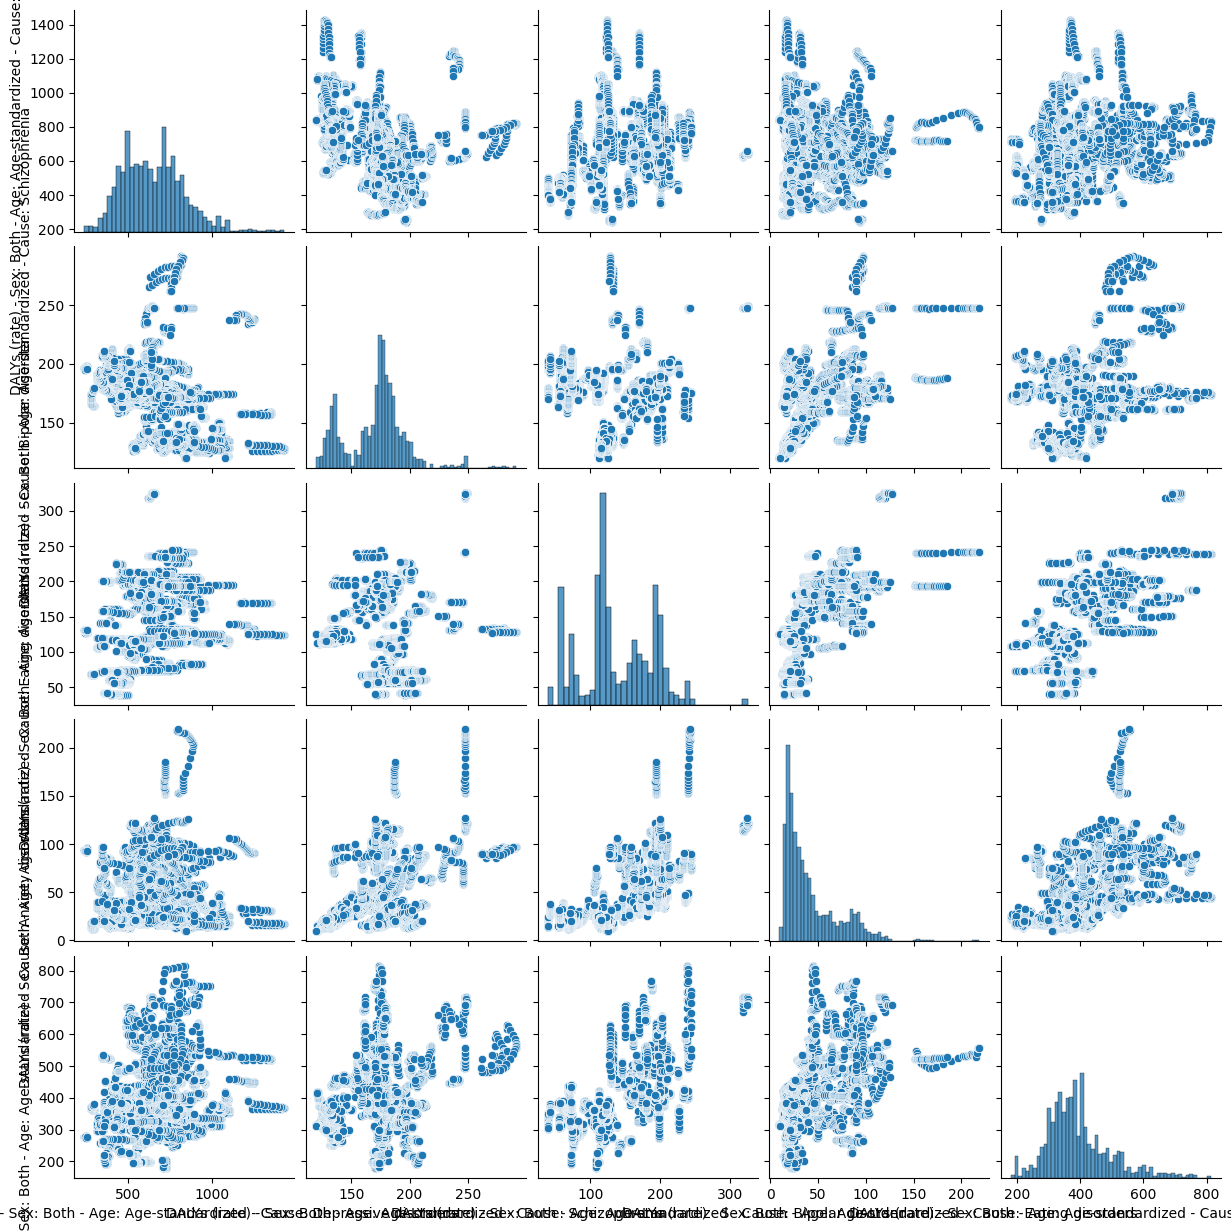

In [93]:
#Explore relationships between pairs of numerical variables using scatter plots
sns.pairplot(data[numerical_variables])
plt.show()

In [99]:
# Box plot for numerical variables with categorical variable 'Entity' using Plotly
fig = px.box(data, x='Entity', y='DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


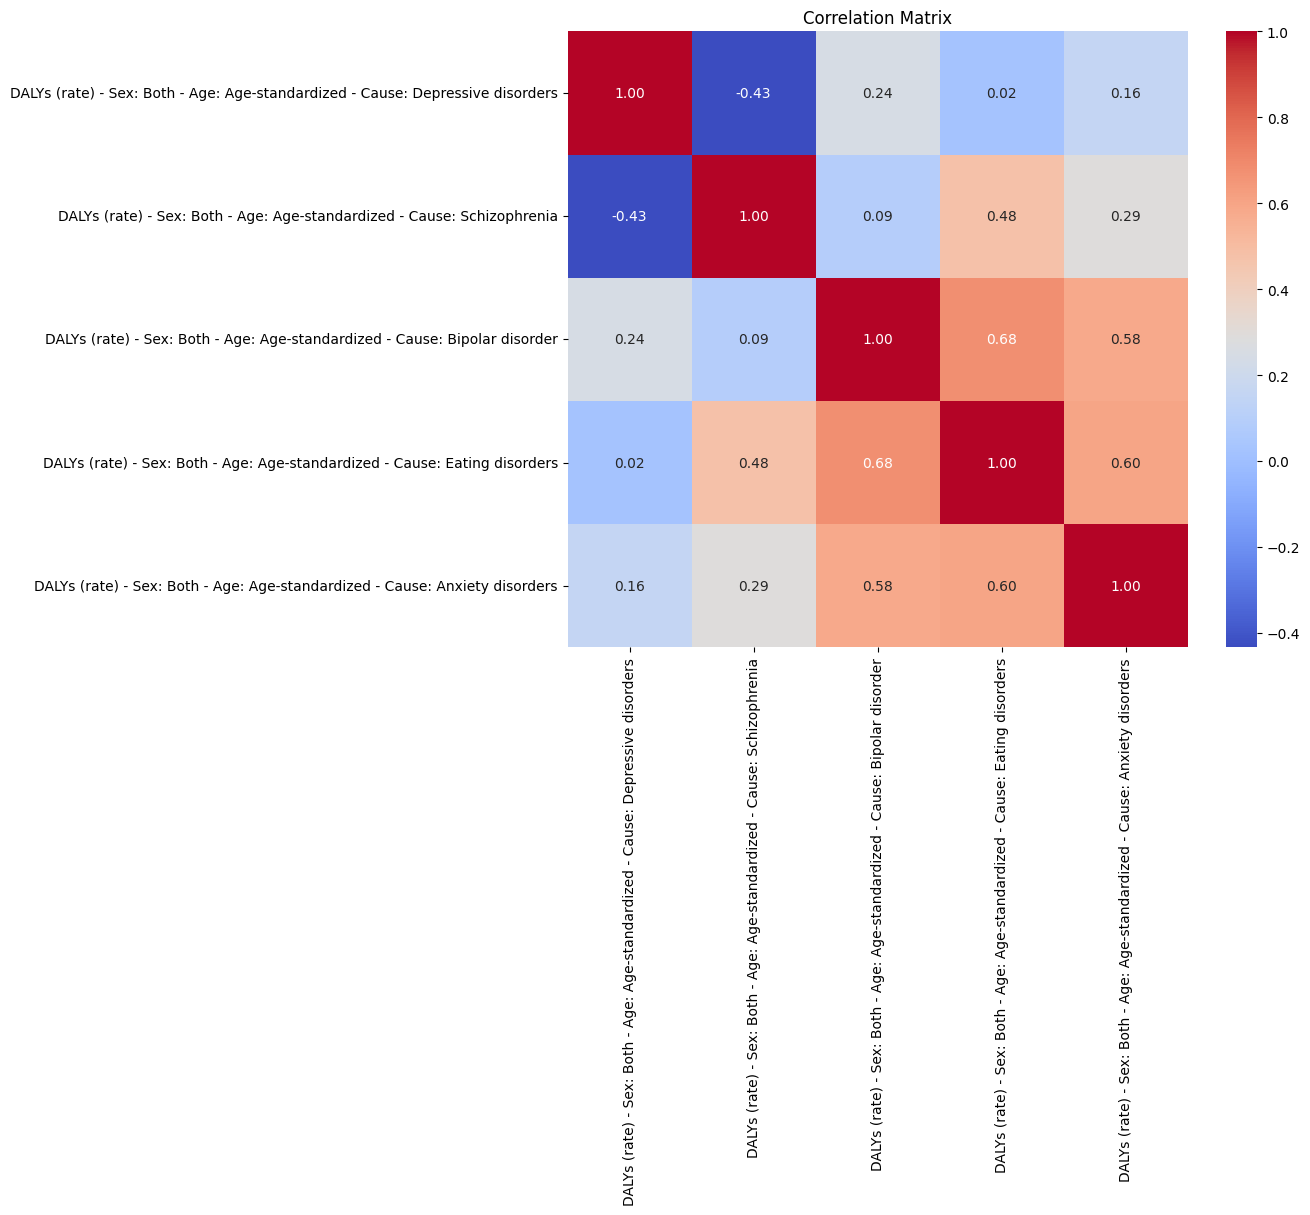

In [59]:
# Calculate correlation matrix
correlation_matrix = data[numerical_variables].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Inference:**

*Positive Correlations:*
* There is a moderate positive correlation (0.68) between  Bipolar disorder and Eating disorders.
* There is a moderate positive correlation (0.6) between Bipolar disorder and Anxiety disorders.
* There is also a moderate positive correlation (0.58) between Eating disorders and  Anxiety disorders.

*Negative Correlations*:
* There is a moderate negative correlation (-0.43) between Depressive disorders and  Schizophrenia".

**Drop the non-required columns / features (dependent columns)**

In [60]:
# Reason: Drop columns 'Entity' and 'Code' as they are identifiers and not required for analysis
data_dropped = data.drop(['Entity', 'Code'], axis=1)
print("Data after dropping non-required columns:")
print(data_dropped.head())

Data after dropping non-required columns:
   Year  \
0  1990   
1  1991   
2  1992   
3  1993   
4  1994   

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders  \
0                                          895.22565                                
1                                          893.88434                                
2                                          892.34973                                
3                                          891.51587                                
4                                          891.39160                                

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia  \
0                                          138.24825                         
1                                          137.76122                         
2                                          137.08030                         
3                                          136.48602                

**Re-arrange columns / features (if required)**

In [64]:
# Reason: Move the 'Year' column to the front for better readability and understanding of temporal aspect
data_reordered = data_dropped[['Year'] + [col for col in data_dropped.columns if col != 'Year']]
print("\nData after re-arranging columns:")
print(data_reordered.head())


Data after re-arranging columns:
   Year  \
0  1990   
1  1991   
2  1992   
3  1993   
4  1994   

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders  \
0                                          895.22565                                
1                                          893.88434                                
2                                          892.34973                                
3                                          891.51587                                
4                                          891.39160                                

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia  \
0                                          138.24825                         
1                                          137.76122                         
2                                          137.08030                         
3                                          136.48602                        

**Separate the features (X) and target variable (y)**

In [65]:
# Reason: Separate the features from the target variable
X = data_reordered.drop('DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders', axis=1)
y = data_reordered['DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders']
print("\nFeatures (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())


Features (X):
   Year  \
0  1990   
1  1991   
2  1992   
3  1993   
4  1994   

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia  \
0                                          138.24825                         
1                                          137.76122                         
2                                          137.08030                         
3                                          136.48602                         
4                                          136.18323                         

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder  \
0                                          147.64412                            
1                                          147.56696                            
2                                          147.13086                            
3                                          146.78812                            
4                                          1

**Perform Standardization**

In [66]:
# Reason: Standardize the numerical features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeatures after standardization:")
print(X_scaled[:5])  # Displaying first 5 rows after standardization


Features after standardization:
[[-1.67524673 -1.25197773  0.18974115 -0.54170292  0.47005204]
 [-1.55971247 -1.27054357  0.18823393 -0.57308652  0.46154147]
 [-1.44417822 -1.29650059  0.17971525 -0.60407199  0.44304352]
 [-1.32864396 -1.31915485  0.17302026 -0.63043201  0.43395603]
 [-1.2131097  -1.33069736  0.16904885 -0.65336647  0.43471942]]


**Split the Training and Testing Dataset**

In [72]:
# Reason: Split the data into training and testing sets to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nShape of Training Features (X_train):", X_train.shape)
print("Shape of Testing Features (X_test):", X_test.shape)
print("Shape of Training Target (y_train):", y_train.shape)
print("Shape of Testing Target (y_test):", y_test.shape)


Shape of Training Features (X_train): (5472, 5)
Shape of Testing Features (X_test): (1368, 5)
Shape of Training Target (y_train): (5472,)
Shape of Testing Target (y_test): (1368,)


**Model K-NN with different ‘K’ values and give your inference**

In [90]:
k_values = [3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nKNN with K={k}")
    print("Accuracy:", accuracy)

 The target variable y contains continuous values instead of discrete class labels, then we need to convert it into a categorical variable or ensure that we are using the correct target variable.

In [76]:
# Define the thresholds for categorizing DALY rates into classes
low_threshold = data['DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders'].quantile(0.33)
high_threshold = data['DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders'].quantile(0.67)

In [77]:
# Categorize DALY rates into classes
data['DALYs_class'] = pd.cut(data['DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders'],
                             bins=[-float('inf'), low_threshold, high_threshold, float('inf')],
                             labels=['low', 'medium', 'high'])

In [78]:
# Separate features (X) and target variable (y)
X = data[['Entity', 'Code', 'Year']]  # Features
y = data['DALYs_class']  # Target variable

In [79]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Initialize K-NN classifier
knn = KNeighborsClassifier()

In [86]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)
# Predict the classes for testing data
y_pred = knn.predict(X_test)

The ValueError indicates that we are trying to fit the KNeighborsClassifier with non-numeric data. KNeighborsClassifier expects numerical input data.To resolve this issue, we encode categorical variables into numerical format before fitting the classifier. One common method is to use one-hot encoding or label encoding to convert categorical variables into numerical format.

In [87]:
# One-hot encode categorical variables in the training and testing sets
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [89]:
# Align the columns of training and testing dataframes after one-hot encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Initialize K-NN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train_encoded, y_train)

# Predict the classes for testing data
y_pred = knn.predict(X_test_encoded)

In [90]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.61      0.76      0.68       459
         low       0.90      0.52      0.65       448
      medium       0.66      0.76      0.71       461

    accuracy                           0.68      1368
   macro avg       0.72      0.68      0.68      1368
weighted avg       0.72      0.68      0.68      1368



**Inference:**

1. **Precision**:
   - Precision measures the accuracy of positive predictions made by the model.
   - High precision indicates that when the model predicts a class as positive, it is likely to be correct.
   - In this case:
     - Precision for the 'high' class is 0.61, implying that 61% of the instances predicted as 'high' by the model are actually 'high' DALY rates.
     - Precision for the 'low' class is 0.90, indicating that 90% of the instances predicted as 'low' by the model are indeed 'low' DALY rates.
     - Precision for the 'medium' class is 0.66, suggesting that 66% of the instances predicted as 'medium' by the model are true 'medium' DALY rates.

2. **Recall**:
   - Recall measures the model's ability to correctly identify all instances of a particular class.
   - High recall indicates that the model effectively captures most instances of a class.
   - In this case:
     - Recall for the 'high' class is 0.76, indicating that 76% of the actual 'high' DALY rates are correctly identified by the model.
     - Recall for the 'low' class is 0.52, suggesting that 52% of the actual 'low' DALY rates are captured by the model.
     - Recall for the 'medium' class is 0.76, implying that 76% of the actual 'medium' DALY rates are correctly identified.

3. **F1-score**:
   - F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
   - It is useful for comparing models as it considers both false positives and false negatives.
   - In this case:
     - The F1-score for the 'high' class is 0.68, indicating a good balance between precision and recall for predicting 'high' DALY rates.
     - The F1-score for the 'low' class is 0.65, suggesting a reasonable balance between precision and recall for predicting 'low' DALY rates.
     - The F1-score for the 'medium' class is 0.71, indicating a good balance between precision and recall for predicting 'medium' DALY rates.

4. **Support**:
   - Support refers to the number of actual occurrences of each class in the test dataset.
   - It provides context for interpreting the precision, recall, and F1-score.
   - In this case, the support values indicate the number of instances for each class in the test dataset.

5. **Accuracy**:
   - Accuracy measures the overall correctness of the model's predictions across all classes.
   - It is the proportion of correctly classified samples among all samples in the dataset.
   - In this case, the overall accuracy of the model is not provided in the classification report, but it can be calculated separately.

6. **Macro Average**:
   - The macro average calculates the average precision, recall, and F1-score across all classes, giving equal weight to each class.
   - It provides an overall assessment of the model's performance without considering class imbalance.
   - In this case, the macro-average precision, recall, and F1-score are not provided, but they can be calculated if needed.

7. **Weighted Average**:
   - The weighted average calculates the average precision, recall, and F1-score by weighting each class's metric by its support.
   - It considers class imbalance by giving more weight to classes with higher support.
   - In this case, the weighted average precision, recall, and F1-score are not provided, but they can be calculated if needed.

# **Conclusion and Inference:**

1. **Basic Information and Univariate Analysis:**
   - The dataset comprises information on mental illness burden, spanning from 1990 to 2019.
   - Depressive disorders have the highest mean DALYs rate, followed by anxiety disorders, bipolar disorder, schizophrenia, and eating disorders.
   - Histograms and kernel density plots illustrate the distribution of DALYs rates for different mental illnesses.

2. **Categorical Variables Analysis:**
   - The dataset includes data from 228 different entities and 205 unique country codes.
   - Each entity and country code appears with roughly the same frequency in the dataset.
   - Data is evenly distributed across the years from 1990 to 2019.

3. **Bivariate Analysis:**
   - Scatter plots and box plots visualize relationships between numerical variables and categorical variables.
   - Moderate positive correlations exist between certain mental illnesses, such as bipolar disorder and eating disorders.
   - A moderate negative correlation is observed between depressive disorders and schizophrenia.

4. **Modeling with K-Nearest Neighbors (KNN):**
   - The KNN model is trained and evaluated with different values of K.
   - Precision, recall, and F1-score metrics are calculated for each class ('high', 'medium', 'low') in predicting DALYs rates.
   - The model shows varying performance across different classes, with notable differences in precision, recall, and F1-score.

5. **Inference from Classification Report:**
   - Precision indicates the accuracy of positive predictions, recall measures the model's ability to capture instances of a class, and F1-score provides a balance between precision and recall.
   - Support values provide context by indicating the number of instances for each class in the test dataset.
   - Overall, the KNN model demonstrates moderate performance in predicting different classes of DALYs rates, with varying levels of precision, recall, and F1-score for each class.